In [184]:
#importing all the required libraries
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style = 'white')
import matplotlib.ticker as mtick

In [185]:
df1 = pd.read_csv("telco_churn.csv"); #loading the dataset

In [186]:
df1.head() # displaying the first five rows, just to get a glimpse of the data.

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [187]:
df1.info() # for the basic info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

The dataset has about 21 columns and 7043 rows. Also, the number of missing values in the dataset are yet to be counted.

In [188]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges, errors='coerce')
df1.isnull().sum() #to findout the null values in the dataset

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [189]:
print("No of missing values: ", df1.isnull().sum().sum())

No of missing values:  11


Out of 21 features and 7043 entries, there are only 11 missing values for one feature named 'Total Charges'. So, we will be dropping all the columns with missing values.

In [190]:
df1.dropna(inplace = True) #removing rows with null values

In [191]:
df2 = df1.iloc[:,1:] #removing customer IDs as they don't influence the target variable.

In [192]:
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True) #converting the target variable into binary numeric value.
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

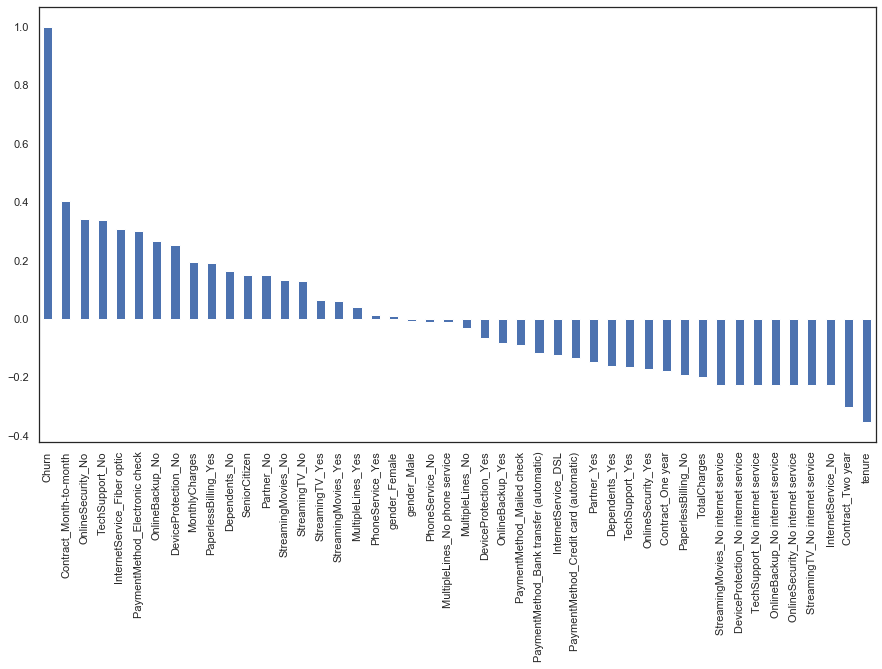

In [193]:
df_dummies = pd.get_dummies(df2) #converting categorical values into indicator variables on to a new dataframe
plt.figure(figsize=(15,8)) #size of the plot
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar') #correlation graph with respect to the target variable

From the above correlation plot, we can observe that contracts that get renewed on a monthly basis have a high positive correlation to churn wile the contracts that get renewed for every two years are negatively correlated. From this we can say that users who renew contracts on a monthly basis are most likely to churn.

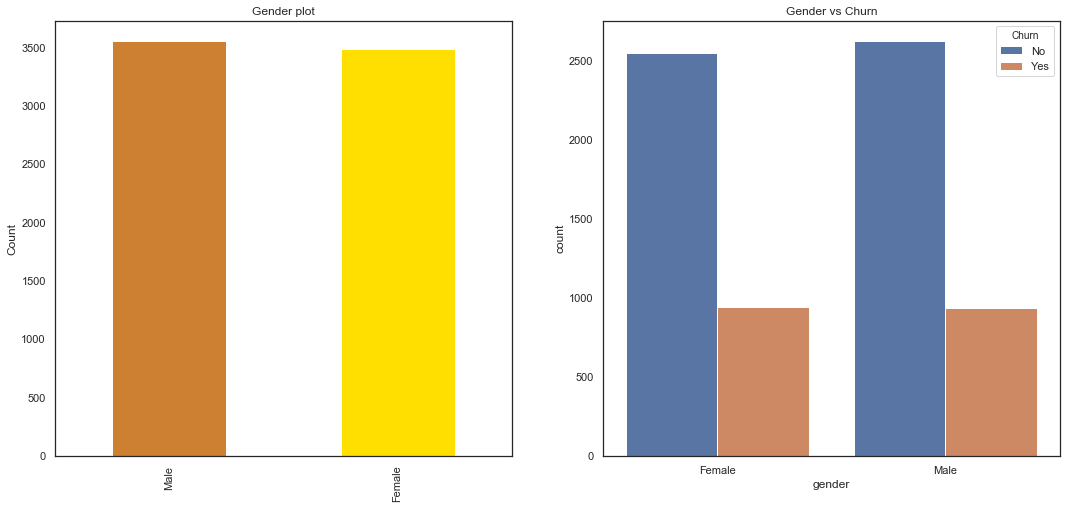

In [194]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df1['gender'].value_counts().plot.bar(color=['#CD7F32','#FFDF00'],ax=ax[0])
ax[0].set_title('Gender plot')
ax[0].set_ylabel('Count')
sns.countplot('gender',hue='Churn',data=df1,ax=ax[1])
ax[1].set_title('Gender vs Churn')
plt.show()

Therefore, we can say that gender isn't a factor affecting the churn as the churn rate is almost the same among all genders.

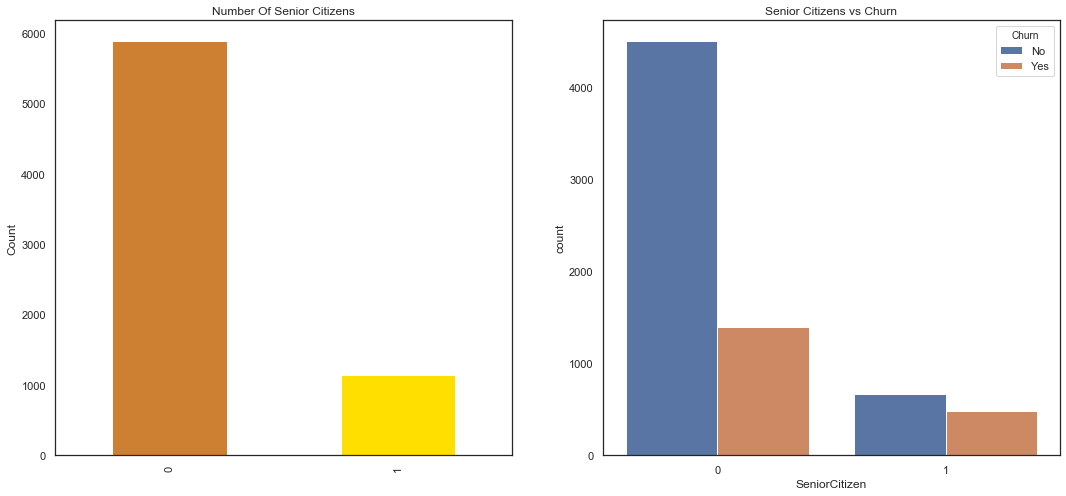

In [195]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df1['SeniorCitizen'].value_counts().plot.bar(color=['#CD7F32','#FFDF00'],ax=ax[0])
ax[0].set_title('Number Of Senior Citizens')
ax[0].set_ylabel('Count')
sns.countplot('SeniorCitizen',hue='Churn',data=df1,ax=ax[1])
ax[1].set_title('Senior Citizens vs Churn')
plt.show()

Observation:
As we noticed in the previous plot, the gender distribution in the dataset and the churn rate among genders are nearly the same. But from the above chart we can deduce that the churn rate is more among senior citizens compared to those who aren't senior citizens.

In [196]:
pd.crosstab([df1.gender,df1.Churn],df1.SeniorCitizen,margins=True).style.background_gradient(cmap='summer_r')

Observation:
The churn rate among senior cititzens is about one third of the count while the churn rate in non senior citizens is about one seventh of the count.

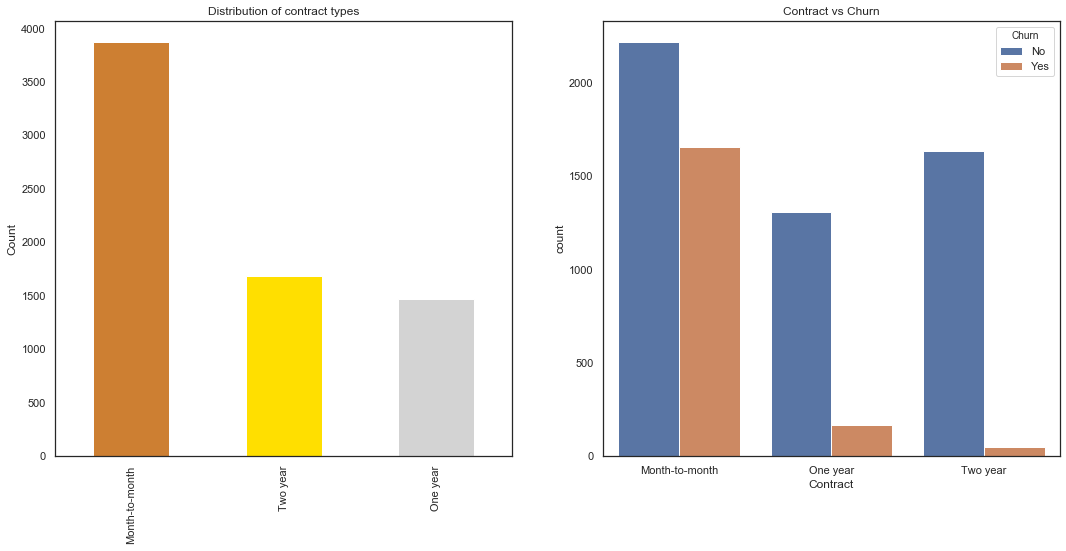

In [197]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df1['Contract'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Distribution of contract types')
ax[0].set_ylabel('Count')
sns.countplot('Contract',hue='Churn',data=df1,ax=ax[1])
ax[1].set_title('Contract vs Churn')
plt.show()

Observation:
From the above graphs it can be deduced that the customers renewing their contracts on a monthly basis are more likely to churn. The attrition is very low in one year contract renewal and even less with two year renewals.

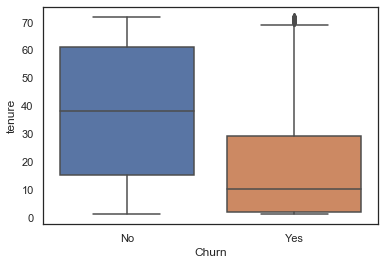

In [198]:
sns.boxplot(x = df1.Churn, y = df1.tenure)


Observation:
The above boxplot conveys the churn distribution with respect to tenure. From this we can interpret that most the loyal customers tend to stay for a longer tenure and on the other hand the majority of the customers who churned remained for short tenures.

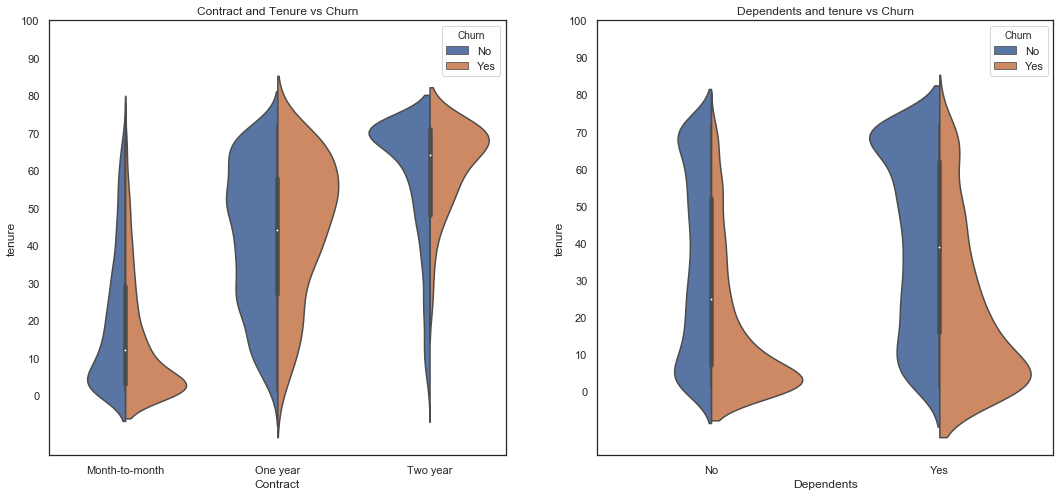

In [199]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Contract","tenure", hue="Churn", data=df1,split=True,ax=ax[0])
ax[0].set_title('Contract and Tenure vs Churn')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Dependents","tenure", hue="Churn", data=df1,split=True,ax=ax[1])
ax[1].set_title('Dependents and tenure vs Churn')
ax[1].set_yticks(range(0,110,10))
plt.show()


1) The first violin plot conveys the distribution of customer churn w.r.t tenure and contract type. The customer distribution across tenure in each contract type, the regions where churn is more can be identified. In month to month contracts churn rate is high, in one year contracts as the tenure increases there is slight increase in the churn.But, in the case of two year contracts the customers are more loyal and the churn rate is low.

2) The second violin plot conveys the distribution of customer churn w.r.t tenure and dependents of the customer. The customers with out any dependents tends to churn more if the in the case of low tenure but as the tenure increases the customers with no dependents tend to be loyal. Similarly, in the case of customers with dependents as the tenure increases they are more loyal and the instances of churn go down.

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

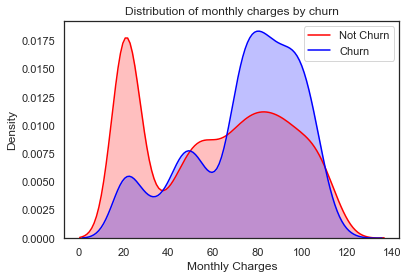

In [200]:
#f,ax=plt.subplots(1,2,figsize=(18,8))
ax[0] = sns.kdeplot(df1.MonthlyCharges[(df1["Churn"] == 'No') ],color="Red", shade = True)
ax[0] = sns.kdeplot(df1.MonthlyCharges[(df1["Churn"] == 'Yes') ],ax =ax[0], color="Blue", shade= True)
ax[0].legend(["Not Churn","Churn"],loc='upper right')
ax[0].set_ylabel('Density')
ax[0].set_xlabel('Monthly Charges')
ax[0].set_title('Distribution of monthly charges by churn')



Observation: From the above plot we can say that customers whose montly charge was low are more likely to stay and on the other hand users whose monthly charges are high are more likely to churn.

In [201]:
df2['Charges_range']=pd.qcut(df1['MonthlyCharges'],4)
df2.groupby(['Charges_range'])['Churn'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Churn
Charges_range,
"(18.249, 35.588]",0.113197
"(35.588, 70.35]",0.245883
"(70.35, 89.862]",0.375499
"(89.862, 118.75]",0.328783


Observation: The above chart contains the probability of churn in each range of monthly charges. As the monthly charges are going up the churn rate is going up as well.

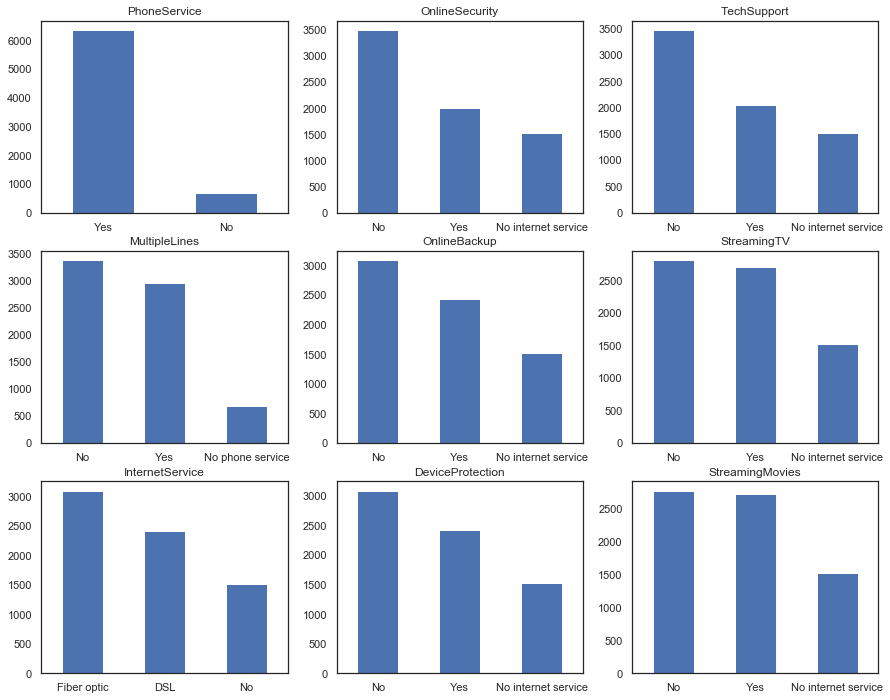

In [202]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = df1[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = df1[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = df1[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)
    


The above graphs show us the split of customer choices among various services offered by the telecom company.

In [203]:
df_dummies1 = pd.get_dummies(df2)

In [204]:
y = df_dummies1['Churn'].values
X = df_dummies1.drop(columns = ['Churn'])

# Converting all variables into a range of O to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [205]:
# Splitting the data to create test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [206]:
# Training the model using logistic regression
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
result = model_lr.fit(X_train, y_train)

C:\Users\sarat\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



In [207]:
from sklearn import metrics
prediction_test1 = model_lr.predict(X_test)
# Printing the prediction accuracy from training on logistic regression
print (metrics.accuracy_score(y_test, prediction_test1))

0.8061611374407583


AxesSubplot(0.125,0.125;0.775x0.755)


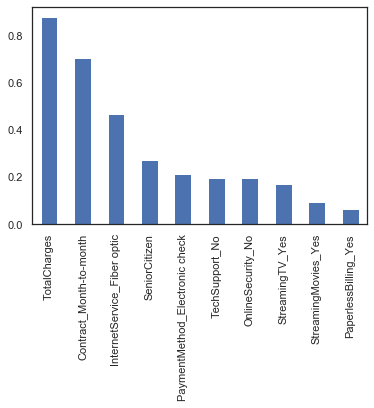

In [208]:
weights = pd.Series(model_lr.coef_[0], index=X.columns.values)#plotting the most positively correlated features
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

Observation: In the the above plot shows the most positively correlated features. TotalCharges, month to month and fiber optic internet service are the 3 most positively correlated features. Followed by seniorcitizen and techsupport. These features positvely correlated more than other features in the case of logistic regression model as they influenced the churn.

One more interpretation is that fiber optic internet is faster and expensive, so that might have been the reason for many customers as their monthly bill was higher and led them to churn

AxesSubplot(0.125,0.125;0.775x0.755)


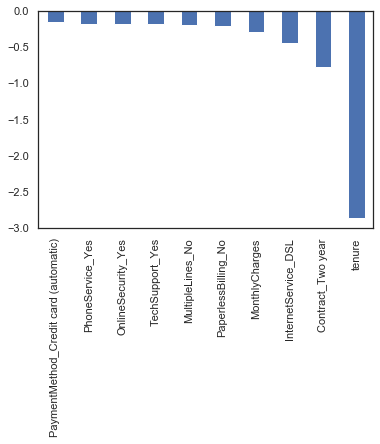

In [209]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))
#plotting the most negatively correlated features

Observation: The above features are negatively correlated to churn. Tenure, two year contracts and internet service with DSL are the highest negatively correlated features in the logistic regression model. One of the most suprising fact is that even though fiber net internet is better and faster customers are preffereing DSL internet. As Fibernet is more expensive,customers are more likely to churn.

In [210]:
from sklearn.ensemble import RandomForestClassifier #fitting data into Randomforest 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,random_state =50, max_features = "auto",max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

#accuracy given Random forest and printing the accuracy given by the random forest algorithm
preds = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, preds))

0.8116560056858564


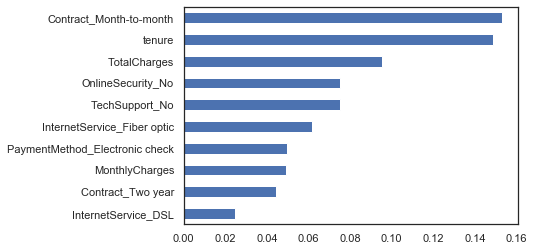

In [211]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

Observation:
Similar to the results from the exploratory data analysis, the features which have the most weight are contract_month-to-month, tenure, total charges are also the key in obtaining the accuracy from Random forest algorithm. The result obtained from the randomforest is better compared to the accuracy obtained from logistic regression. 

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

from sklearn.svm import SVC

model_svm = SVC(kernel='linear', probability =True) 
model_svm.fit(X_train,y_train)
preds = model_svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8194740582800284

In [213]:
# Create the Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,preds))  

[[951  91]
 [163 202]]


In [214]:
from sklearn.tree import DecisionTreeClassifier #Decision Tree
model_dt=DecisionTreeClassifier()
model_dt.fit(X_train,y_train)
preds=model_dt.predict(X_test)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(y_test,preds))

The accuracy of the Decision Tree is 0.7412935323383084


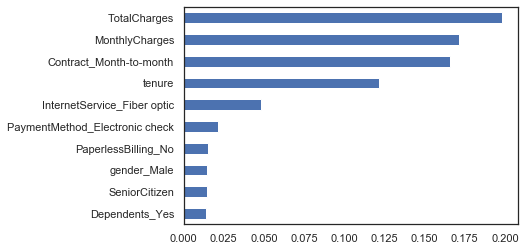

In [215]:
pd.Series(model_dt.feature_importances_,X.columns).sort_values()[-10:].plot(kind='barh')

In [216]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
model_ada = AdaBoostClassifier()
model_ada.fit(X_train,y_train)
preds = model_ada.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8159203980099502

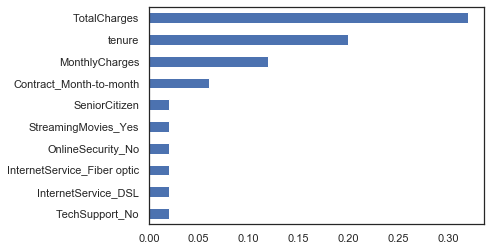

In [217]:
pd.Series(model_ada.feature_importances_,X.columns).sort_values()[-10:].plot(kind='barh')

In [218]:
from sklearn.neighbors import KNeighborsClassifier #KNN
model_knn=KNeighborsClassifier() 
model_knn.fit(X_train,y_train)
preds = model_knn.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.749822316986496

In [219]:
from sklearn.naive_bayes import GaussianNB #GNB
model_gnb = GaussianNB(priors=None)
model_gnb.fit(X_train, y_train)
preds = model_gnb.predict(X_test)
metrics.accuracy_score(y_test, preds)


0.6993603411513859

In [220]:
import plotly.offline as py #Model Performance
py.init_notebook_mode(connected=True)
import plotly.figure_factory as ff
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
import statsmodels.api as sm

from sklearn.metrics import precision_score,recall_score


#gives model report in dataframe
def model_report(model,X_train, X_test, y_train, y_test,name) :
    model.fit(X_train,y_train)
    predictions  = model.predict(X_test)
    accuracy     = accuracy_score(y_test,predictions)
    recallscore  = recall_score(y_test,predictions)
    precision    = precision_score(y_test,predictions)
    roc_auc      = roc_auc_score(y_test,predictions)
    f1score      = f1_score(y_test,predictions) 
    kappa_metric = cohen_kappa_score(y_test,predictions)
    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy score"  : [accuracy],
                       "Recall score"    : [recallscore],
                       "Precision"       : [precision],
                       "F1 score"        : [f1score],
                       "Area under curve": [roc_auc],
                       "Kappa metric"    : [kappa_metric],
                      })
    return df

#outputs for every model
model1 = model_report(model_lr,X_train, X_test, y_train, y_test, "Logistic Regression")
model2 = model_report(model_dt,X_train, X_test, y_train, y_test,"Decision Tree")
model3 = model_report(model_rf,X_train, X_test, y_train, y_test,"RF Classifier")
model4 = model_report(model_svm,X_train, X_test, y_train, y_test,"SVM")
model5 = model_report(model_ada,X_train, X_test, y_train, y_test,"ADA Boost")
model6 = model_report(model_knn,X_train, X_test, y_train, y_test,"KNN classifier")
model7 = model_report(model_gnb,X_train, X_test, y_train, y_test,"Naive Bayes")


#concat all models
model_performances = pd.concat([model1,model2,model3,model4,model5, model6, model7],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)

table  = ff.create_table(np.round(model_performances,4))

py.iplot(table)

C:\Users\sarat\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



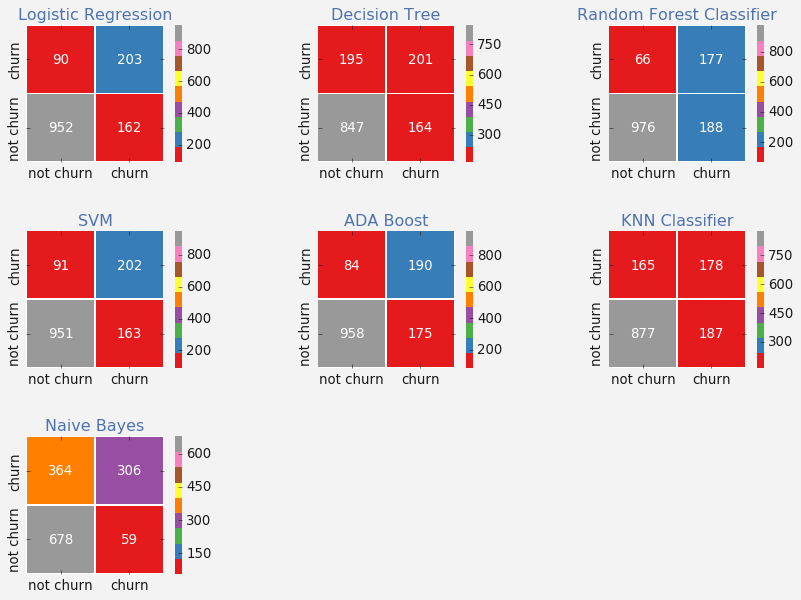

In [245]:

import itertools
import seaborn as sns;
lst    = [model_lr,model_dt,model_rf,model_svm,model_ada,model_knn, model_gnb]

length = len(lst)

mods   = ['Logistic Regression',
          'Decision Tree','Random Forest Classifier',
          'SVM','ADA Boost','KNN Classifier', 'Naive Bayes']

fig = plt.figure(figsize=(13,15))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    plt.subplot(5,3,j+1)
    predictions = i.predict(X_test)
    conf_matrix = confusion_matrix(predictions,y_test)
    ax = sns.heatmap(conf_matrix,annot = True,fmt = "d",square =True,
                xticklabels=["not churn","churn"],       
                yticklabels=["not churn","churn"],
                linewidths = 0.5, linecolor = "w",cmap = "Set1")
    ax.set_ylim(0 ,2)
    plt.title(k,color = "b")
    plt.subplots_adjust( wspace = .3,hspace = .5)

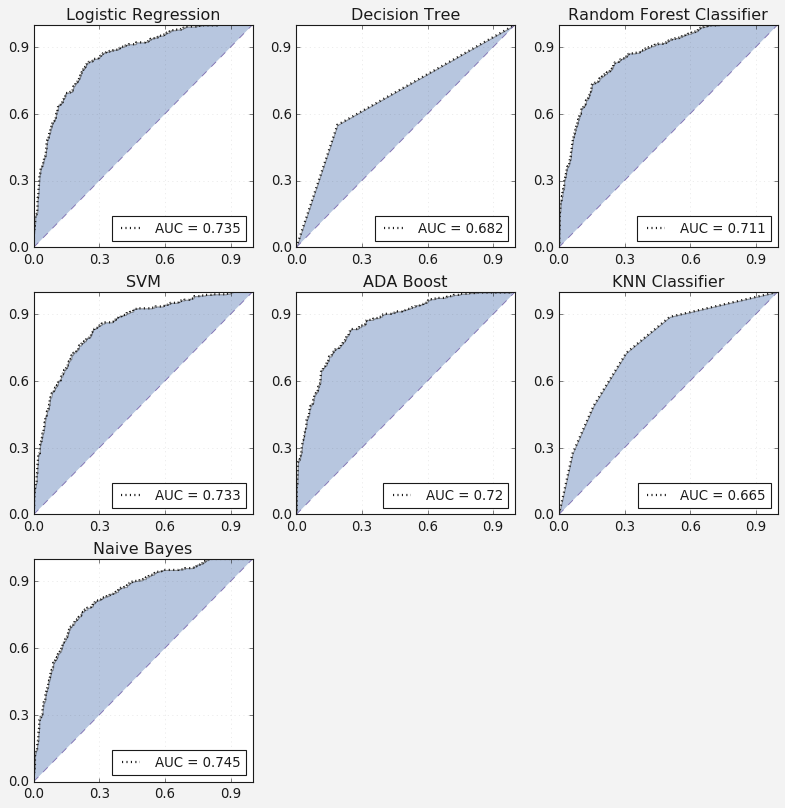

In [246]:
plt.style.use("classic")
fig = plt.figure(figsize=(12,16))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods):
    qx = plt.subplot(4,3,j+1)
    probabilities = i.predict_proba(X_test)
    predictions   = i.predict(X_test)
    fpr,tpr,thresholds = roc_curve(y_test,probabilities[:,1])
    plt.plot(fpr,tpr,linestyle = "dotted",
             color = "k",linewidth = 2,
             label = "AUC = " + str(np.around(roc_auc_score(y_test,predictions),3)))
    plt.plot([0,1],[0,1],linestyle = "dashed",
             color = "m",linewidth = 0.8)
    plt.fill_between(fpr,tpr,alpha = .4)
    plt.fill_between([0,1],[0,1],color = "w")
    plt.legend(loc = "lower right",
               prop = {"size" : 12})
    qx.set_facecolor("w")
    plt.grid(True,alpha = .15)
    plt.title(k,color = "k")
    plt.xticks(np.arange(0,1,.3))
    plt.yticks(np.arange(0,1,.3))